🔄 Chargement des données...
✅ Données chargées avec succès !

📌 APERÇU DES DONNÉES

📋 Customers (1000 lignes, 7 colonnes) :
   Customer_ID     Name  Age  Gender     Location   Join_Date  Total_Spent
0         2001    Alice   28  Female     New York  2022-05-10        500.0
1         2002      Bob   35    Male  Los Angeles  2022-06-15        750.0
2         2003  Charlie   22    Male      Chicago  2022-07-20        300.0
3         2004    Diana   30  Female      Houston  2022-08-25        600.0
4         2005      Eva   27  Female      Phoenix  2022-09-30        450.0

Colonnes disponibles : ['Customer_ID', 'Name', 'Age', 'Gender', 'Location', 'Join_Date', 'Total_Spent']

📋 Sales (1000 lignes, 7 colonnes) :
   Sale_ID  Product_ID  Customer_ID        Date  Quantity  Sale_Price  \
0        1         101         2001  2023-01-15         2        50.0   
1        2         102         2002  2023-01-16         1        75.0   
2        3         103         2001  2023-01-17         3        

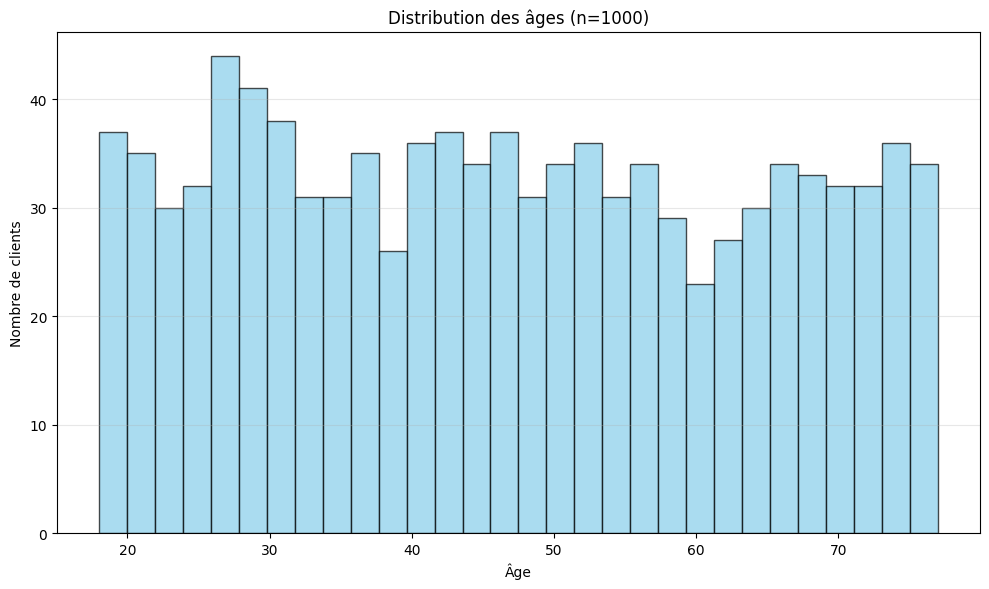


🔗 Préparation de la jointure...
✅ Colonnes de jointure trouvées : sales['Product_ID'] ↔ products['Product_ID']
📊 IDs dans sales : 634
📊 IDs dans products : 1000
📊 IDs communs : 634
✅ Jointure effectuée : 1000 lignes résultantes


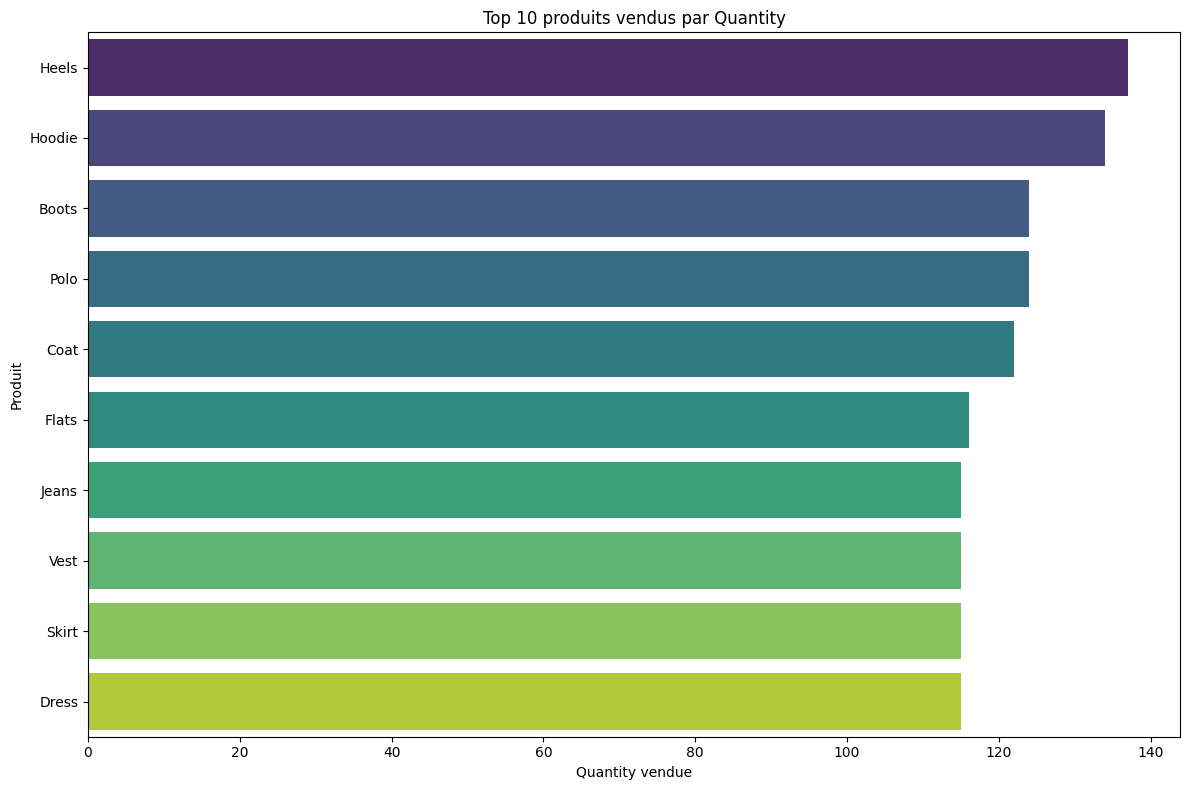

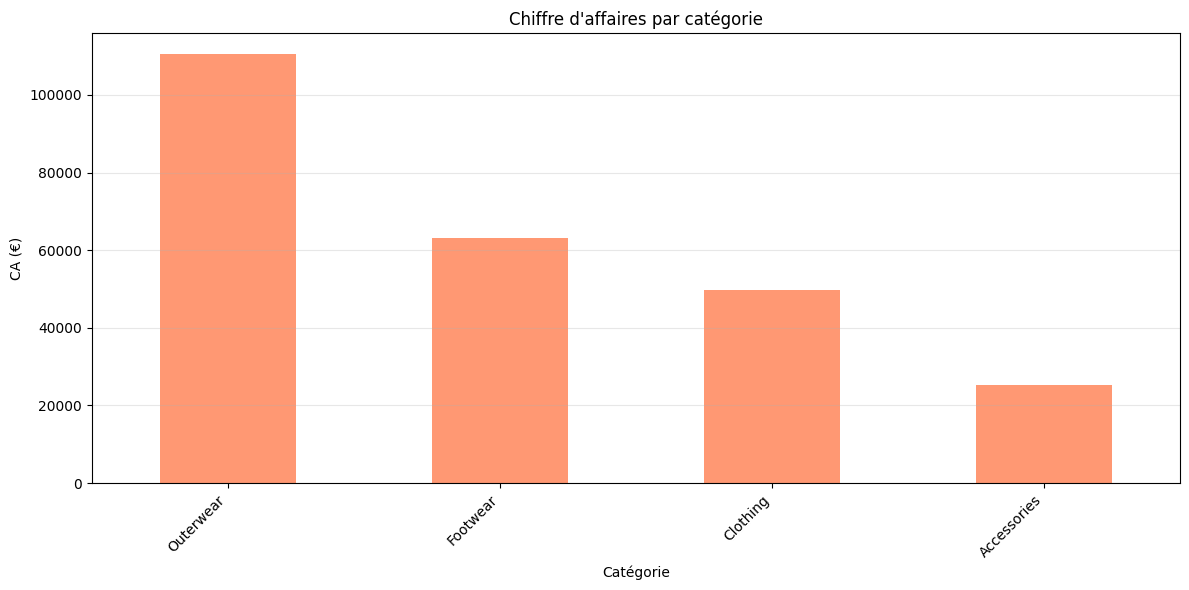


🔍 Analyse de corrélation...


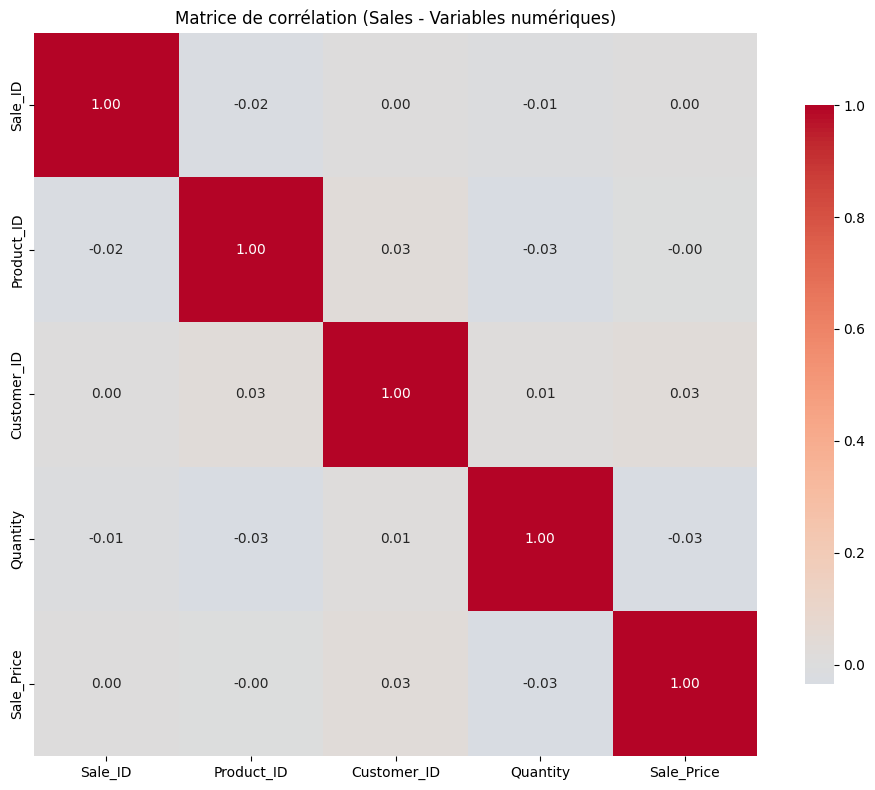


✅ ANALYSE TERMINÉE


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration pour l'affichage des graphiques
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 10

try:
    # 📂 Chargement des données
    print("🔄 Chargement des données...")
    customers = pd.read_csv('../data/customers_data.csv')
    sales = pd.read_csv('../data/sales_data.csv')
    products = pd.read_csv('../data/products_data.csv')
    print("✅ Données chargées avec succès !")
    
except FileNotFoundError as e:
    print(f"❌ Erreur : Fichier introuvable - {e}")
    print("💡 Vérifiez que les fichiers CSV sont dans le dossier '../data/'")
    exit()

# 🔍 Aperçu rapide
print("\n" + "="*50)
print("📌 APERÇU DES DONNÉES")
print("="*50)

print(f"\n📋 Customers ({customers.shape[0]} lignes, {customers.shape[1]} colonnes) :")
print(customers.head())
print(f"\nColonnes disponibles : {list(customers.columns)}")

print(f"\n📋 Sales ({sales.shape[0]} lignes, {sales.shape[1]} colonnes) :")
print(sales.head())
print(f"Colonnes disponibles : {list(sales.columns)}")

print(f"\n📋 Products ({products.shape[0]} lignes, {products.shape[1]} colonnes) :")
print(products.head())
print(f"Colonnes disponibles : {list(products.columns)}")

# 🛠 Analyse des valeurs manquantes
print("\n" + "="*50)
print("🔍 ANALYSE DES VALEURS MANQUANTES")
print("="*50)

for name, df in [("Customers", customers), ("Sales", sales), ("Products", products)]:
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\n📉 Valeurs manquantes dans {name} :")
        for col, count in missing[missing > 0].items():
            print(f"  - {col}: {count} ({count/len(df)*100:.1f}%)")
    else:
        print(f"\n✅ Aucune valeur manquante dans {name}")

# ✂️ Nettoyage des données
print("\n" + "="*50)
print("🧹 NETTOYAGE DES DONNÉES")
print("="*50)

# Suppression des doublons
print("🔄 Suppression des doublons...")
customers_before = len(customers)
sales_before = len(sales)
products_before = len(products)

customers.drop_duplicates(inplace=True)
sales.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)

print(f"  - Customers : {customers_before} → {len(customers)} ({customers_before - len(customers)} doublons supprimés)")
print(f"  - Sales : {sales_before} → {len(sales)} ({sales_before - len(sales)} doublons supprimés)")
print(f"  - Products : {products_before} → {len(products)} ({products_before - len(products)} doublons supprimés)")

# Traitement de l'âge manquant
age_cols = ['age', 'Age', 'AGE', 'customer_age']  # Différents noms possibles
age_col = None
for col in age_cols:
    if col in customers.columns:
        age_col = col
        break

if age_col:
    missing_ages = customers[age_col].isnull().sum()
    if missing_ages > 0:
        median_age = customers[age_col].median()
        customers[age_col].fillna(median_age, inplace=True)
        print(f"✅ {missing_ages} valeurs d'âge manquantes remplies par la médiane ({median_age:.0f})")
    else:
        print("✅ Aucune valeur d'âge manquante")
else:
    print("⚠️ Aucune colonne d'âge trouvée")

# Traitement des dates
date_cols = ['date', 'Date', 'sale_date', 'order_date', 'transaction_date']
date_col = None
for col in date_cols:
    if col in sales.columns:
        date_col = col
        break

if date_col:
    try:
        sales[date_col] = pd.to_datetime(sales[date_col], errors='coerce')
        invalid_dates = sales[date_col].isnull().sum()
        if invalid_dates > 0:
            print(f"⚠️ {invalid_dates} dates invalides détectées et converties en NaT")
        else:
            print(f"✅ Colonne '{date_col}' convertie en datetime")
    except Exception as e:
        print(f"❌ Erreur lors de la conversion des dates : {e}")
else:
    print("⚠️ Aucune colonne de date trouvée")

# 📊 Visualisation distribution âge
print("\n" + "="*50)
print("📊 VISUALISATIONS")
print("="*50)

if age_col and customers[age_col].notna().any():
    plt.figure(figsize=(10, 6))
    plt.hist(customers[age_col].dropna(), bins=30, color='skyblue', 
             edgecolor='black', alpha=0.7)
    plt.title(f'Distribution des âges (n={customers[age_col].notna().sum()})')
    plt.xlabel('Âge')
    plt.ylabel('Nombre de clients')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Impossible de créer l'histogramme des âges")

# 🔗 Préparation de la jointure
print("\n🔗 Préparation de la jointure...")

# Recherche des colonnes de jointure possibles
possible_product_ids = ['product_id', 'Product_ID', 'ProductID', 'id']
sales_product_col = None
products_product_col = None

for col in possible_product_ids:
    if col in sales.columns:
        sales_product_col = col
        break

for col in possible_product_ids:
    if col in products.columns:
        products_product_col = col
        break

if sales_product_col and products_product_col:
    print(f"✅ Colonnes de jointure trouvées : sales['{sales_product_col}'] ↔ products['{products_product_col}']")
    
    # Vérification de la cohérence des IDs
    sales_ids = set(sales[sales_product_col].dropna())
    products_ids = set(products[products_product_col].dropna())
    common_ids = sales_ids.intersection(products_ids)
    
    print(f"📊 IDs dans sales : {len(sales_ids)}")
    print(f"📊 IDs dans products : {len(products_ids)}")
    print(f"📊 IDs communs : {len(common_ids)}")
    
    if len(common_ids) == 0:
        print("⚠️ Aucun ID commun trouvé ! Vérifiez la cohérence des données.")
    
    # Jointure
    sales_products = sales.merge(products, 
                                left_on=sales_product_col, 
                                right_on=products_product_col, 
                                how='left')
    print(f"✅ Jointure effectuée : {len(sales_products)} lignes résultantes")
    
else:
    print("❌ Impossible de trouver les colonnes pour la jointure")
    print(f"Colonnes dans sales : {list(sales.columns)}")
    print(f"Colonnes dans products : {list(products.columns)}")
    # Créer un DataFrame vide pour éviter les erreurs
    sales_products = sales.copy()

# 💰 Analyse des produits les plus vendus
if 'sales_products' in locals() and len(sales_products) > 0:
    # Recherche des colonnes nécessaires
    name_cols = ['product_name', 'Product_Name', 'name', 'Name']
    quantity_cols = ['quantity', 'Quantity', 'qty', 'amount']
    
    name_col = None
    quantity_col = None
    
    for col in name_cols:
        if col in sales_products.columns:
            name_col = col
            break
    
    for col in quantity_cols:
        if col in sales_products.columns:
            quantity_col = col
            break
    
    if name_col and quantity_col:
        # Top 10 produits par quantité
        top_products = (sales_products.groupby(name_col)[quantity_col]
                       .sum().sort_values(ascending=False).head(10))
        
        if len(top_products) > 0:
            plt.figure(figsize=(12, 8))
            sns.barplot(x=top_products.values, y=top_products.index, 
                       palette="viridis")
            plt.title(f"Top 10 produits vendus par {quantity_col}")
            plt.xlabel(f"{quantity_col.title()} vendue")
            plt.ylabel("Produit")
            plt.tight_layout()
            plt.show()
        else:
            print("⚠️ Aucune donnée de vente trouvée")
    else:
        print(f"⚠️ Colonnes manquantes pour l'analyse des produits")
        print(f"Nom du produit trouvé : {name_col}")
        print(f"Quantité trouvée : {quantity_col}")

# 📈 Chiffre d'affaires par catégorie
if 'sales_products' in locals() and len(sales_products) > 0:
    category_cols = ['category', 'Category', 'product_category']
    price_cols = ['price', 'Price', 'unit_price', 'amount']
    
    category_col = None
    price_col = None
    
    for col in category_cols:
        if col in sales_products.columns:
            category_col = col
            break
    
    for col in price_cols:
        if col in sales_products.columns:
            price_col = col
            break
    
    if category_col and price_col and quantity_col:
        try:
            # Calcul du CA par catégorie
            sales_products['revenue'] = (pd.to_numeric(sales_products[quantity_col], errors='coerce') * 
                                       pd.to_numeric(sales_products[price_col], errors='coerce'))
            
            ca_category = (sales_products.groupby(category_col)['revenue']
                          .sum().sort_values(ascending=False))
            
            if len(ca_category) > 0:
                plt.figure(figsize=(12, 6))
                ca_category.plot(kind='bar', color='coral', alpha=0.8)
                plt.title("Chiffre d'affaires par catégorie")
                plt.ylabel("CA (€)")
                plt.xlabel("Catégorie")
                plt.xticks(rotation=45, ha='right')
                plt.grid(axis='y', alpha=0.3)
                plt.tight_layout()
                plt.show()
            else:
                print("⚠️ Aucune donnée de CA par catégorie")
        except Exception as e:
            print(f"❌ Erreur dans le calcul du CA : {e}")
    else:
        print("⚠️ Colonnes manquantes pour l'analyse du CA par catégorie")

# 📊 Matrice de corrélation
print("\n🔍 Analyse de corrélation...")
numeric_cols = sales.select_dtypes(include=['number'])

if len(numeric_cols.columns) >= 2:
    # Suppression des colonnes avec trop de valeurs manquantes
    numeric_cols = numeric_cols.loc[:, numeric_cols.isnull().mean() < 0.5]
    
    if len(numeric_cols.columns) >= 2:
        plt.figure(figsize=(10, 8))
        correlation_matrix = numeric_cols.corr()
        
        # Masquer les valeurs NaN
        mask = correlation_matrix.isnull()
        
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", 
                   center=0, fmt='.2f', mask=mask,
                   square=True, cbar_kws={"shrink": .8})
        plt.title("Matrice de corrélation (Sales - Variables numériques)")
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Pas assez de colonnes numériques valides pour la corrélation")
else:
    print("⚠️ Pas assez de colonnes numériques dans les données de ventes")

print("\n" + "="*50)
print("✅ ANALYSE TERMINÉE")
print("="*50)